In [2]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import absolute_import, division, print_function, unicode_literals
pd.options.display.float_format = "{:.1f}".format


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

https://www.youtube.com/watch?v=2vtnA9RR-VU
https://github.com/manifoldailearning/Deep-Learning-2020/blob/master/Class_9_%26_10_Deep_learning_2020_Regression.ipynb

In [67]:
dados = '''0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30
  396.90   4.98  24.00
 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80
  396.90   9.14  21.60
 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80
  392.83   4.03  34.70
 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70
  394.63   2.94  33.40
 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70
  396.90   5.33  36.20
 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70
  394.12   5.21  28.70
 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20
  395.60  12.43  22.90
 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20
  396.90  19.15  27.10
 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20
  386.63  29.93  16.50
 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20
  386.71  17.10  18.90
 0.22489  12.50   7.870  0  0.5240  6.3770  94.30  6.3467   5  311.0  15.20
  392.52  20.45  15.00
 0.11747  12.50   7.870  0  0.5240  6.0090  82.90  6.2267   5  311.0  15.20
  396.90  13.27  18.90
 0.09378  12.50   7.870  0  0.5240  5.8890  39.00  5.4509   5  311.0  15.20
  390.50  15.71  21.70
 0.62976   0.00   8.140  0  0.5380  5.9490  61.80  4.7075   4  307.0  21.00
  396.90   8.26  20.40
 0.63796   0.00   8.140  0  0.5380  6.0960  84.50  4.4619   4  307.0  21.00
  380.02  10.26  18.20
 0.62739   0.00   8.140  0  0.5380  5.8340  56.50  4.4986   4  307.0  21.00
  395.62   8.47  19.90
 1.05393   0.00   8.140  0  0.5380  5.9350  29.30  4.4986   4  307.0  21.00
  386.85   6.58  23.10
 0.78420   0.00   8.140  0  0.5380  5.9900  81.70  4.2579   4  307.0  21.00
  386.75  14.67  17.50
 0.80271   0.00   8.140  0  0.5380  5.4560  36.60  3.7965   4  307.0  21.00
  288.99  11.69  20.20
 0.72580   0.00   8.140  0  0.5380  5.7270  69.50  3.7965   4  307.0  21.00
  390.95  11.28  18.20
 1.25179   0.00   8.140  0  0.5380  5.5700  98.10  3.7979   4  307.0  21.00
  376.57  21.02  13.60
 0.85204   0.00   8.140  0  0.5380  5.9650  89.20  4.0123   4  307.0  21.00
  392.53  13.83  19.60
 1.23247   0.00   8.140  0  0.5380  6.1420  91.70  3.9769   4  307.0  21.00
  396.90  18.72  15.20
 0.98843   0.00   8.140  0  0.5380  5.8130 100.00  4.0952   4  307.0  21.00
  394.54  19.88  14.50
 0.75026   0.00   8.140  0  0.5380  5.9240  94.10  4.3996   4  307.0  21.00
  394.33  16.30  15.60
 0.84054   0.00   8.140  0  0.5380  5.5990  85.70  4.4546   4  307.0  21.00
  303.42  16.51  13.90
 0.67191   0.00   8.140  0  0.5380  5.8130  90.30  4.6820   4  307.0  21.00
  376.88  14.81  16.60
 0.95577   0.00   8.140  0  0.5380  6.0470  88.80  4.4534   4  307.0  21.00
  306.38  17.28  14.80
 0.77299   0.00   8.140  0  0.5380  6.4950  94.40  4.4547   4  307.0  21.00
  387.94  12.80  18.40
 1.00245   0.00   8.140  0  0.5380  6.6740  87.30  4.2390   4  307.0  21.00
  380.23  11.98  21.00
 1.13081   0.00   8.140  0  0.5380  5.7130  94.10  4.2330   4  307.0  21.00
  360.17  22.60  12.70
 1.35472   0.00   8.140  0  0.5380  6.0720 100.00  4.1750   4  307.0  21.00
  376.73  13.04  14.50
 1.38799   0.00   8.140  0  0.5380  5.9500  82.00  3.9900   4  307.0  21.00
  232.60  27.71  13.20
 1.15172   0.00   8.140  0  0.5380  5.7010  95.00  3.7872   4  307.0  21.00
  358.77  18.35  13.10
 1.61282   0.00   8.140  0  0.5380  6.0960  96.90  3.7598   4  307.0  21.00
  248.31  20.34  13.50
 0.06417   0.00   5.960  0  0.4990  5.9330  68.20  3.3603   5  279.0  19.20
  396.90   9.68  18.90
 0.09744   0.00   5.960  0  0.4990  5.8410  61.40  3.3779   5  279.0  19.20
  377.56  11.41  20.00
 0.08014   0.00   5.960  0  0.4990  5.8500  41.50  3.9342   5  279.0  19.20
  396.90   8.77  21.00
 0.17505   0.00   5.960  0  0.4990  5.9660  30.20  3.8473   5  279.0  19.20
  393.43  10.13  24.70
 0.02763  75.00   2.950  0  0.4280  6.5950  21.80  5.4011   3  252.0  18.30
  395.63   4.32  30.80
 0.03359  75.00   2.950  0  0.4280  7.0240  15.80  5.4011   3  252.0  18.30
  395.62   1.98  34.90
 0.12744   0.00   6.910  0  0.4480  6.7700   2.90  5.7209   3  233.0  17.90
  385.41   4.84  26.60
 0.14150   0.00   6.910  0  0.4480  6.1690   6.60  5.7209   3  233.0  17.90
  383.37   5.81  25.30
 0.15936   0.00   6.910  0  0.4480  6.2110   6.50  5.7209   3  233.0  17.90
  394.46   7.44  24.70
 0.12269   0.00   6.910  0  0.4480  6.0690  40.00  5.7209   3  233.0  17.90
  389.39   9.55  21.20
 0.17142   0.00   6.910  0  0.4480  5.6820  33.80  5.1004   3  233.0  17.90
  396.90  10.21  19.30
 0.18836   0.00   6.910  0  0.4480  5.7860  33.30  5.1004   3  233.0  17.90
  396.90  14.15  20.00
 0.22927   0.00   6.910  0  0.4480  6.0300  85.50  5.6894   3  233.0  17.90
  392.74  18.80  16.60
 0.25387   0.00   6.910  0  0.4480  5.3990  95.30  5.8700   3  233.0  17.90
  396.90  30.81  14.40
 0.21977   0.00   6.910  0  0.4480  5.6020  62.00  6.0877   3  233.0  17.90
  396.90  16.20  19.40
 0.08873  21.00   5.640  0  0.4390  5.9630  45.70  6.8147   4  243.0  16.80
  395.56  13.45  19.70
 0.04337  21.00   5.640  0  0.4390  6.1150  63.00  6.8147   4  243.0  16.80
  393.97   9.43  20.50
 0.05360  21.00   5.640  0  0.4390  6.5110  21.10  6.8147   4  243.0  16.80
  396.90   5.28  25.00
 0.04981  21.00   5.640  0  0.4390  5.9980  21.40  6.8147   4  243.0  16.80
  396.90   8.43  23.40
 0.01360  75.00   4.000  0  0.4100  5.8880  47.60  7.3197   3  469.0  21.10
  396.90  14.80  18.90
 0.01311  90.00   1.220  0  0.4030  7.2490  21.90  8.6966   5  226.0  17.90
  395.93   4.81  35.40
 0.02055  85.00   0.740  0  0.4100  6.3830  35.70  9.1876   2  313.0  17.30
  396.90   5.77  24.70
 0.01432 100.00   1.320  0  0.4110  6.8160  40.50  8.3248   5  256.0  15.10
  392.90   3.95  31.60
 0.15445  25.00   5.130  0  0.4530  6.1450  29.20  7.8148   8  284.0  19.70
  390.68   6.86  23.30
 0.10328  25.00   5.130  0  0.4530  5.9270  47.20  6.9320   8  284.0  19.70
  396.90   9.22  19.60
 0.14932  25.00   5.130  0  0.4530  5.7410  66.20  7.2254   8  284.0  19.70
  395.11  13.15  18.70
 0.17171  25.00   5.130  0  0.4530  5.9660  93.40  6.8185   8  284.0  19.70
  378.08  14.44  16.00
 0.11027  25.00   5.130  0  0.4530  6.4560  67.80  7.2255   8  284.0  19.70
  396.90   6.73  22.20
 0.12650  25.00   5.130  0  0.4530  6.7620  43.40  7.9809   8  284.0  19.70
  395.58   9.50  25.00
 0.01951  17.50   1.380  0  0.4161  7.1040  59.50  9.2229   3  216.0  18.60
  393.24   8.05  33.00
 0.03584  80.00   3.370  0  0.3980  6.2900  17.80  6.6115   4  337.0  16.10
  396.90   4.67  23.50
 0.04379  80.00   3.370  0  0.3980  5.7870  31.10  6.6115   4  337.0  16.10
  396.90  10.24  19.40
 0.05789  12.50   6.070  0  0.4090  5.8780  21.40  6.4980   4  345.0  18.90
  396.21   8.10  22.00
 0.13554  12.50   6.070  0  0.4090  5.5940  36.80  6.4980   4  345.0  18.90
  396.90  13.09  17.40
 0.12816  12.50   6.070  0  0.4090  5.8850  33.00  6.4980   4  345.0  18.90
  396.90   8.79  20.90
 0.08826   0.00  10.810  0  0.4130  6.4170   6.60  5.2873   4  305.0  19.20
  383.73   6.72  24.20
 0.15876   0.00  10.810  0  0.4130  5.9610  17.50  5.2873   4  305.0  19.20
  376.94   9.88  21.70
 0.09164   0.00  10.810  0  0.4130  6.0650   7.80  5.2873   4  305.0  19.20
  390.91   5.52  22.80
 0.19539   0.00  10.810  0  0.4130  6.2450   6.20  5.2873   4  305.0  19.20
  377.17   7.54  23.40
 0.07896   0.00  12.830  0  0.4370  6.2730   6.00  4.2515   5  398.0  18.70
  394.92   6.78  24.10
 0.09512   0.00  12.830  0  0.4370  6.2860  45.00  4.5026   5  398.0  18.70
  383.23   8.94  21.40
 0.10153   0.00  12.830  0  0.4370  6.2790  74.50  4.0522   5  398.0  18.70
  373.66  11.97  20.00
 0.08707   0.00  12.830  0  0.4370  6.1400  45.80  4.0905   5  398.0  18.70
  386.96  10.27  20.80
 0.05646   0.00  12.830  0  0.4370  6.2320  53.70  5.0141   5  398.0  18.70
  386.40  12.34  21.20
 0.08387   0.00  12.830  0  0.4370  5.8740  36.60  4.5026   5  398.0  18.70
  396.06   9.10  20.30
 0.04113  25.00   4.860  0  0.4260  6.7270  33.50  5.4007   4  281.0  19.00
  396.90   5.29  28.00
 0.04462  25.00   4.860  0  0.4260  6.6190  70.40  5.4007   4  281.0  19.00
  395.63   7.22  23.90
 0.03659  25.00   4.860  0  0.4260  6.3020  32.20  5.4007   4  281.0  19.00
  396.90   6.72  24.80
 0.03551  25.00   4.860  0  0.4260  6.1670  46.70  5.4007   4  281.0  19.00
  390.64   7.51  22.90
 0.05059   0.00   4.490  0  0.4490  6.3890  48.00  4.7794   3  247.0  18.50
  396.90   9.62  23.90
 0.05735   0.00   4.490  0  0.4490  6.6300  56.10  4.4377   3  247.0  18.50
  392.30   6.53  26.60
 0.05188   0.00   4.490  0  0.4490  6.0150  45.10  4.4272   3  247.0  18.50
  395.99  12.86  22.50
 0.07151   0.00   4.490  0  0.4490  6.1210  56.80  3.7476   3  247.0  18.50
  395.15   8.44  22.20
 0.05660   0.00   3.410  0  0.4890  7.0070  86.30  3.4217   2  270.0  17.80
  396.90   5.50  23.60
 0.05302   0.00   3.410  0  0.4890  7.0790  63.10  3.4145   2  270.0  17.80
  396.06   5.70  28.70
 0.04684   0.00   3.410  0  0.4890  6.4170  66.10  3.0923   2  270.0  17.80
  392.18   8.81  22.60
 0.03932   0.00   3.410  0  0.4890  6.4050  73.90  3.0921   2  270.0  17.80
  393.55   8.20  22.00
 0.04203  28.00  15.040  0  0.4640  6.4420  53.60  3.6659   4  270.0  18.20
  395.01   8.16  22.90
 0.02875  28.00  15.040  0  0.4640  6.2110  28.90  3.6659   4  270.0  18.20
  396.33   6.21  25.00
 0.04294  28.00  15.040  0  0.4640  6.2490  77.30  3.6150   4  270.0  18.20
  396.90  10.59  20.60
 0.12204   0.00   2.890  0  0.4450  6.6250  57.80  3.4952   2  276.0  18.00
  357.98   6.65  28.40
 0.11504   0.00   2.890  0  0.4450  6.1630  69.60  3.4952   2  276.0  18.00
  391.83  11.34  21.40
 0.12083   0.00   2.890  0  0.4450  8.0690  76.00  3.4952   2  276.0  18.00
  396.90   4.21  38.70
 0.08187   0.00   2.890  0  0.4450  7.8200  36.90  3.4952   2  276.0  18.00
  393.53   3.57  43.80
 0.06860   0.00   2.890  0  0.4450  7.4160  62.50  3.4952   2  276.0  18.00
  396.90   6.19  33.20
 0.14866   0.00   8.560  0  0.5200  6.7270  79.90  2.7778   5  384.0  20.90
  394.76   9.42  27.50
 0.11432   0.00   8.560  0  0.5200  6.7810  71.30  2.8561   5  384.0  20.90
  395.58   7.67  26.50
 0.22876   0.00   8.560  0  0.5200  6.4050  85.40  2.7147   5  384.0  20.90
   70.80  10.63  18.60
 0.21161   0.00   8.560  0  0.5200  6.1370  87.40  2.7147   5  384.0  20.90
  394.47  13.44  19.30
 0.13960   0.00   8.560  0  0.5200  6.1670  90.00  2.4210   5  384.0  20.90
  392.69  12.33  20.10
 0.13262   0.00   8.560  0  0.5200  5.8510  96.70  2.1069   5  384.0  20.90
  394.05  16.47  19.50
 0.17120   0.00   8.560  0  0.5200  5.8360  91.90  2.2110   5  384.0  20.90
  395.67  18.66  19.50
 0.13117   0.00   8.560  0  0.5200  6.1270  85.20  2.1224   5  384.0  20.90
  387.69  14.09  20.40
 0.12802   0.00   8.560  0  0.5200  6.4740  97.10  2.4329   5  384.0  20.90
  395.24  12.27  19.80
 0.26363   0.00   8.560  0  0.5200  6.2290  91.20  2.5451   5  384.0  20.90
  391.23  15.55  19.40
 0.10793   0.00   8.560  0  0.5200  6.1950  54.40  2.7778   5  384.0  20.90
  393.49  13.00  21.70
 0.10084   0.00  10.010  0  0.5470  6.7150  81.60  2.6775   6  432.0  17.80
  395.59  10.16  22.80
 0.12329   0.00  10.010  0  0.5470  5.9130  92.90  2.3534   6  432.0  17.80
  394.95  16.21  18.80
 0.22212   0.00  10.010  0  0.5470  6.0920  95.40  2.5480   6  432.0  17.80
  396.90  17.09  18.70
 0.14231   0.00  10.010  0  0.5470  6.2540  84.20  2.2565   6  432.0  17.80
  388.74  10.45  18.50
 0.17134   0.00  10.010  0  0.5470  5.9280  88.20  2.4631   6  432.0  17.80
  344.91  15.76  18.30
 0.13158   0.00  10.010  0  0.5470  6.1760  72.50  2.7301   6  432.0  17.80
  393.30  12.04  21.20
 0.15098   0.00  10.010  0  0.5470  6.0210  82.60  2.7474   6  432.0  17.80
  394.51  10.30  19.20
 0.13058   0.00  10.010  0  0.5470  5.8720  73.10  2.4775   6  432.0  17.80
  338.63  15.37  20.40
 0.14476   0.00  10.010  0  0.5470  5.7310  65.20  2.7592   6  432.0  17.80
  391.50  13.61  19.30
 0.06899   0.00  25.650  0  0.5810  5.8700  69.70  2.2577   2  188.0  19.10
  389.15  14.37  22.00
 0.07165   0.00  25.650  0  0.5810  6.0040  84.10  2.1974   2  188.0  19.10
  377.67  14.27  20.30
 0.09299   0.00  25.650  0  0.5810  5.9610  92.90  2.0869   2  188.0  19.10
  378.09  17.93  20.50
 0.15038   0.00  25.650  0  0.5810  5.8560  97.00  1.9444   2  188.0  19.10
  370.31  25.41  17.30
 0.09849   0.00  25.650  0  0.5810  5.8790  95.80  2.0063   2  188.0  19.10
  379.38  17.58  18.80
 0.16902   0.00  25.650  0  0.5810  5.9860  88.40  1.9929   2  188.0  19.10
  385.02  14.81  21.40
 0.38735   0.00  25.650  0  0.5810  5.6130  95.60  1.7572   2  188.0  19.10
  359.29  27.26  15.70
 0.25915   0.00  21.890  0  0.6240  5.6930  96.00  1.7883   4  437.0  21.20
  392.11  17.19  16.20
 0.32543   0.00  21.890  0  0.6240  6.4310  98.80  1.8125   4  437.0  21.20
  396.90  15.39  18.00
 0.88125   0.00  21.890  0  0.6240  5.6370  94.70  1.9799   4  437.0  21.20
  396.90  18.34  14.30
 0.34006   0.00  21.890  0  0.6240  6.4580  98.90  2.1185   4  437.0  21.20
  395.04  12.60  19.20
 1.19294   0.00  21.890  0  0.6240  6.3260  97.70  2.2710   4  437.0  21.20
  396.90  12.26  19.60
 0.59005   0.00  21.890  0  0.6240  6.3720  97.90  2.3274   4  437.0  21.20
  385.76  11.12  23.00
 0.32982   0.00  21.890  0  0.6240  5.8220  95.40  2.4699   4  437.0  21.20
  388.69  15.03  18.40
 0.97617   0.00  21.890  0  0.6240  5.7570  98.40  2.3460   4  437.0  21.20
  262.76  17.31  15.60
 0.55778   0.00  21.890  0  0.6240  6.3350  98.20  2.1107   4  437.0  21.20
  394.67  16.96  18.10
 0.32264   0.00  21.890  0  0.6240  5.9420  93.50  1.9669   4  437.0  21.20
  378.25  16.90  17.40
 0.35233   0.00  21.890  0  0.6240  6.4540  98.40  1.8498   4  437.0  21.20
  394.08  14.59  17.10
 0.24980   0.00  21.890  0  0.6240  5.8570  98.20  1.6686   4  437.0  21.20
  392.04  21.32  13.30
 0.54452   0.00  21.890  0  0.6240  6.1510  97.90  1.6687   4  437.0  21.20
  396.90  18.46  17.80
 0.29090   0.00  21.890  0  0.6240  6.1740  93.60  1.6119   4  437.0  21.20
  388.08  24.16  14.00
 1.62864   0.00  21.890  0  0.6240  5.0190 100.00  1.4394   4  437.0  21.20
  396.90  34.41  14.40
 3.32105   0.00  19.580  1  0.8710  5.4030 100.00  1.3216   5  403.0  14.70
  396.90  26.82  13.40
 4.09740   0.00  19.580  0  0.8710  5.4680 100.00  1.4118   5  403.0  14.70
  396.90  26.42  15.60
 2.77974   0.00  19.580  0  0.8710  4.9030  97.80  1.3459   5  403.0  14.70
  396.90  29.29  11.80
 2.37934   0.00  19.580  0  0.8710  6.1300 100.00  1.4191   5  403.0  14.70
  172.91  27.80  13.80
 2.15505   0.00  19.580  0  0.8710  5.6280 100.00  1.5166   5  403.0  14.70
  169.27  16.65  15.60
 2.36862   0.00  19.580  0  0.8710  4.9260  95.70  1.4608   5  403.0  14.70
  391.71  29.53  14.60
 2.33099   0.00  19.580  0  0.8710  5.1860  93.80  1.5296   5  403.0  14.70
  356.99  28.32  17.80
 2.73397   0.00  19.580  0  0.8710  5.5970  94.90  1.5257   5  403.0  14.70
  351.85  21.45  15.40
 1.65660   0.00  19.580  0  0.8710  6.1220  97.30  1.6180   5  403.0  14.70
  372.80  14.10  21.50
 1.49632   0.00  19.580  0  0.8710  5.4040 100.00  1.5916   5  403.0  14.70
  341.60  13.28  19.60
 1.12658   0.00  19.580  1  0.8710  5.0120  88.00  1.6102   5  403.0  14.70
  343.28  12.12  15.30
 2.14918   0.00  19.580  0  0.8710  5.7090  98.50  1.6232   5  403.0  14.70
  261.95  15.79  19.40
 1.41385   0.00  19.580  1  0.8710  6.1290  96.00  1.7494   5  403.0  14.70
  321.02  15.12  17.00
 3.53501   0.00  19.580  1  0.8710  6.1520  82.60  1.7455   5  403.0  14.70
   88.01  15.02  15.60
 2.44668   0.00  19.580  0  0.8710  5.2720  94.00  1.7364   5  403.0  14.70
   88.63  16.14  13.10
 1.22358   0.00  19.580  0  0.6050  6.9430  97.40  1.8773   5  403.0  14.70
  363.43   4.59  41.30
 1.34284   0.00  19.580  0  0.6050  6.0660 100.00  1.7573   5  403.0  14.70
  353.89   6.43  24.30
 1.42502   0.00  19.580  0  0.8710  6.5100 100.00  1.7659   5  403.0  14.70
  364.31   7.39  23.30
 1.27346   0.00  19.580  1  0.6050  6.2500  92.60  1.7984   5  403.0  14.70
  338.92   5.50  27.00
 1.46336   0.00  19.580  0  0.6050  7.4890  90.80  1.9709   5  403.0  14.70
  374.43   1.73  50.00
 1.83377   0.00  19.580  1  0.6050  7.8020  98.20  2.0407   5  403.0  14.70
  389.61   1.92  50.00
 1.51902   0.00  19.580  1  0.6050  8.3750  93.90  2.1620   5  403.0  14.70
  388.45   3.32  50.00
 2.24236   0.00  19.580  0  0.6050  5.8540  91.80  2.4220   5  403.0  14.70
  395.11  11.64  22.70
 2.92400   0.00  19.580  0  0.6050  6.1010  93.00  2.2834   5  403.0  14.70
  240.16   9.81  25.00
 2.01019   0.00  19.580  0  0.6050  7.9290  96.20  2.0459   5  403.0  14.70
  369.30   3.70  50.00
 1.80028   0.00  19.580  0  0.6050  5.8770  79.20  2.4259   5  403.0  14.70
  227.61  12.14  23.80
 2.30040   0.00  19.580  0  0.6050  6.3190  96.10  2.1000   5  403.0  14.70
  297.09  11.10  23.80
 2.44953   0.00  19.580  0  0.6050  6.4020  95.20  2.2625   5  403.0  14.70
  330.04  11.32  22.30
 1.20742   0.00  19.580  0  0.6050  5.8750  94.60  2.4259   5  403.0  14.70
  292.29  14.43  17.40
 2.31390   0.00  19.580  0  0.6050  5.8800  97.30  2.3887   5  403.0  14.70
  348.13  12.03  19.10
 0.13914   0.00   4.050  0  0.5100  5.5720  88.50  2.5961   5  296.0  16.60
  396.90  14.69  23.10
 0.09178   0.00   4.050  0  0.5100  6.4160  84.10  2.6463   5  296.0  16.60
  395.50   9.04  23.60
 0.08447   0.00   4.050  0  0.5100  5.8590  68.70  2.7019   5  296.0  16.60
  393.23   9.64  22.60
 0.06664   0.00   4.050  0  0.5100  6.5460  33.10  3.1323   5  296.0  16.60
  390.96   5.33  29.40
 0.07022   0.00   4.050  0  0.5100  6.0200  47.20  3.5549   5  296.0  16.60
  393.23  10.11  23.20
 0.05425   0.00   4.050  0  0.5100  6.3150  73.40  3.3175   5  296.0  16.60
  395.60   6.29  24.60
 0.06642   0.00   4.050  0  0.5100  6.8600  74.40  2.9153   5  296.0  16.60
  391.27   6.92  29.90
 0.05780   0.00   2.460  0  0.4880  6.9800  58.40  2.8290   3  193.0  17.80
  396.90   5.04  37.20
 0.06588   0.00   2.460  0  0.4880  7.7650  83.30  2.7410   3  193.0  17.80
  395.56   7.56  39.80
 0.06888   0.00   2.460  0  0.4880  6.1440  62.20  2.5979   3  193.0  17.80
  396.90   9.45  36.20
 0.09103   0.00   2.460  0  0.4880  7.1550  92.20  2.7006   3  193.0  17.80
  394.12   4.82  37.90
 0.10008   0.00   2.460  0  0.4880  6.5630  95.60  2.8470   3  193.0  17.80
  396.90   5.68  32.50
 0.08308   0.00   2.460  0  0.4880  5.6040  89.80  2.9879   3  193.0  17.80
  391.00  13.98  26.40
 0.06047   0.00   2.460  0  0.4880  6.1530  68.80  3.2797   3  193.0  17.80
  387.11  13.15  29.60
 0.05602   0.00   2.460  0  0.4880  7.8310  53.60  3.1992   3  193.0  17.80
  392.63   4.45  50.00
 0.07875  45.00   3.440  0  0.4370  6.7820  41.10  3.7886   5  398.0  15.20
  393.87   6.68  32.00
 0.12579  45.00   3.440  0  0.4370  6.5560  29.10  4.5667   5  398.0  15.20
  382.84   4.56  29.80
 0.08370  45.00   3.440  0  0.4370  7.1850  38.90  4.5667   5  398.0  15.20
  396.90   5.39  34.90
 0.09068  45.00   3.440  0  0.4370  6.9510  21.50  6.4798   5  398.0  15.20
  377.68   5.10  37.00
 0.06911  45.00   3.440  0  0.4370  6.7390  30.80  6.4798   5  398.0  15.20
  389.71   4.69  30.50
 0.08664  45.00   3.440  0  0.4370  7.1780  26.30  6.4798   5  398.0  15.20
  390.49   2.87  36.40
 0.02187  60.00   2.930  0  0.4010  6.8000   9.90  6.2196   1  265.0  15.60
  393.37   5.03  31.10
 0.01439  60.00   2.930  0  0.4010  6.6040  18.80  6.2196   1  265.0  15.60
  376.70   4.38  29.10
 0.01381  80.00   0.460  0  0.4220  7.8750  32.00  5.6484   4  255.0  14.40
  394.23   2.97  50.00
 0.04011  80.00   1.520  0  0.4040  7.2870  34.10  7.3090   2  329.0  12.60
  396.90   4.08  33.30
 0.04666  80.00   1.520  0  0.4040  7.1070  36.60  7.3090   2  329.0  12.60
  354.31   8.61  30.30
 0.03768  80.00   1.520  0  0.4040  7.2740  38.30  7.3090   2  329.0  12.60
  392.20   6.62  34.60
 0.03150  95.00   1.470  0  0.4030  6.9750  15.30  7.6534   3  402.0  17.00
  396.90   4.56  34.90
 0.01778  95.00   1.470  0  0.4030  7.1350  13.90  7.6534   3  402.0  17.00
  384.30   4.45  32.90
 0.03445  82.50   2.030  0  0.4150  6.1620  38.40  6.2700   2  348.0  14.70
  393.77   7.43  24.10
 0.02177  82.50   2.030  0  0.4150  7.6100  15.70  6.2700   2  348.0  14.70
  395.38   3.11  42.30
 0.03510  95.00   2.680  0  0.4161  7.8530  33.20  5.1180   4  224.0  14.70
  392.78   3.81  48.50
 0.02009  95.00   2.680  0  0.4161  8.0340  31.90  5.1180   4  224.0  14.70
  390.55   2.88  50.00
 0.13642   0.00  10.590  0  0.4890  5.8910  22.30  3.9454   4  277.0  18.60
  396.90  10.87  22.60
 0.22969   0.00  10.590  0  0.4890  6.3260  52.50  4.3549   4  277.0  18.60
  394.87  10.97  24.40
 0.25199   0.00  10.590  0  0.4890  5.7830  72.70  4.3549   4  277.0  18.60
  389.43  18.06  22.50
 0.13587   0.00  10.590  1  0.4890  6.0640  59.10  4.2392   4  277.0  18.60
  381.32  14.66  24.40
 0.43571   0.00  10.590  1  0.4890  5.3440 100.00  3.8750   4  277.0  18.60
  396.90  23.09  20.00
 0.17446   0.00  10.590  1  0.4890  5.9600  92.10  3.8771   4  277.0  18.60
  393.25  17.27  21.70
 0.37578   0.00  10.590  1  0.4890  5.4040  88.60  3.6650   4  277.0  18.60
  395.24  23.98  19.30
 0.21719   0.00  10.590  1  0.4890  5.8070  53.80  3.6526   4  277.0  18.60
  390.94  16.03  22.40
 0.14052   0.00  10.590  0  0.4890  6.3750  32.30  3.9454   4  277.0  18.60
  385.81   9.38  28.10
 0.28955   0.00  10.590  0  0.4890  5.4120   9.80  3.5875   4  277.0  18.60
  348.93  29.55  23.70
 0.19802   0.00  10.590  0  0.4890  6.1820  42.40  3.9454   4  277.0  18.60
  393.63   9.47  25.00
 0.04560   0.00  13.890  1  0.5500  5.8880  56.00  3.1121   5  276.0  16.40
  392.80  13.51  23.30
 0.07013   0.00  13.890  0  0.5500  6.6420  85.10  3.4211   5  276.0  16.40
  392.78   9.69  28.70
 0.11069   0.00  13.890  1  0.5500  5.9510  93.80  2.8893   5  276.0  16.40
  396.90  17.92  21.50
 0.11425   0.00  13.890  1  0.5500  6.3730  92.40  3.3633   5  276.0  16.40
  393.74  10.50  23.00
 0.35809   0.00   6.200  1  0.5070  6.9510  88.50  2.8617   8  307.0  17.40
  391.70   9.71  26.70
 0.40771   0.00   6.200  1  0.5070  6.1640  91.30  3.0480   8  307.0  17.40
  395.24  21.46  21.70
 0.62356   0.00   6.200  1  0.5070  6.8790  77.70  3.2721   8  307.0  17.40
  390.39   9.93  27.50
 0.61470   0.00   6.200  0  0.5070  6.6180  80.80  3.2721   8  307.0  17.40
  396.90   7.60  30.10
 0.31533   0.00   6.200  0  0.5040  8.2660  78.30  2.8944   8  307.0  17.40
  385.05   4.14  44.80
 0.52693   0.00   6.200  0  0.5040  8.7250  83.00  2.8944   8  307.0  17.40
  382.00   4.63  50.00
 0.38214   0.00   6.200  0  0.5040  8.0400  86.50  3.2157   8  307.0  17.40
  387.38   3.13  37.60
 0.41238   0.00   6.200  0  0.5040  7.1630  79.90  3.2157   8  307.0  17.40
  372.08   6.36  31.60
 0.29819   0.00   6.200  0  0.5040  7.6860  17.00  3.3751   8  307.0  17.40
  377.51   3.92  46.70
 0.44178   0.00   6.200  0  0.5040  6.5520  21.40  3.3751   8  307.0  17.40
  380.34   3.76  31.50
 0.53700   0.00   6.200  0  0.5040  5.9810  68.10  3.6715   8  307.0  17.40
  378.35  11.65  24.30
 0.46296   0.00   6.200  0  0.5040  7.4120  76.90  3.6715   8  307.0  17.40
  376.14   5.25  31.70
 0.57529   0.00   6.200  0  0.5070  8.3370  73.30  3.8384   8  307.0  17.40
  385.91   2.47  41.70
 0.33147   0.00   6.200  0  0.5070  8.2470  70.40  3.6519   8  307.0  17.40
  378.95   3.95  48.30
 0.44791   0.00   6.200  1  0.5070  6.7260  66.50  3.6519   8  307.0  17.40
  360.20   8.05  29.00
 0.33045   0.00   6.200  0  0.5070  6.0860  61.50  3.6519   8  307.0  17.40
  376.75  10.88  24.00
 0.52058   0.00   6.200  1  0.5070  6.6310  76.50  4.1480   8  307.0  17.40
  388.45   9.54  25.10
 0.51183   0.00   6.200  0  0.5070  7.3580  71.60  4.1480   8  307.0  17.40
  390.07   4.73  31.50
 0.08244  30.00   4.930  0  0.4280  6.4810  18.50  6.1899   6  300.0  16.60
  379.41   6.36  23.70
 0.09252  30.00   4.930  0  0.4280  6.6060  42.20  6.1899   6  300.0  16.60
  383.78   7.37  23.30
 0.11329  30.00   4.930  0  0.4280  6.8970  54.30  6.3361   6  300.0  16.60
  391.25  11.38  22.00
 0.10612  30.00   4.930  0  0.4280  6.0950  65.10  6.3361   6  300.0  16.60
  394.62  12.40  20.10
 0.10290  30.00   4.930  0  0.4280  6.3580  52.90  7.0355   6  300.0  16.60
  372.75  11.22  22.20
 0.12757  30.00   4.930  0  0.4280  6.3930   7.80  7.0355   6  300.0  16.60
  374.71   5.19  23.70
 0.20608  22.00   5.860  0  0.4310  5.5930  76.50  7.9549   7  330.0  19.10
  372.49  12.50  17.60
 0.19133  22.00   5.860  0  0.4310  5.6050  70.20  7.9549   7  330.0  19.10
  389.13  18.46  18.50
 0.33983  22.00   5.860  0  0.4310  6.1080  34.90  8.0555   7  330.0  19.10
  390.18   9.16  24.30
 0.19657  22.00   5.860  0  0.4310  6.2260  79.20  8.0555   7  330.0  19.10
  376.14  10.15  20.50
 0.16439  22.00   5.860  0  0.4310  6.4330  49.10  7.8265   7  330.0  19.10
  374.71   9.52  24.50
 0.19073  22.00   5.860  0  0.4310  6.7180  17.50  7.8265   7  330.0  19.10
  393.74   6.56  26.20
 0.14030  22.00   5.860  0  0.4310  6.4870  13.00  7.3967   7  330.0  19.10
  396.28   5.90  24.40
 0.21409  22.00   5.860  0  0.4310  6.4380   8.90  7.3967   7  330.0  19.10
  377.07   3.59  24.80
 0.08221  22.00   5.860  0  0.4310  6.9570   6.80  8.9067   7  330.0  19.10
  386.09   3.53  29.60
 0.36894  22.00   5.860  0  0.4310  8.2590   8.40  8.9067   7  330.0  19.10
  396.90   3.54  42.80
 0.04819  80.00   3.640  0  0.3920  6.1080  32.00  9.2203   1  315.0  16.40
  392.89   6.57  21.90
 0.03548  80.00   3.640  0  0.3920  5.8760  19.10  9.2203   1  315.0  16.40
  395.18   9.25  20.90
 0.01538  90.00   3.750  0  0.3940  7.4540  34.20  6.3361   3  244.0  15.90
  386.34   3.11  44.00
 0.61154  20.00   3.970  0  0.6470  8.7040  86.90  1.8010   5  264.0  13.00
  389.70   5.12  50.00
 0.66351  20.00   3.970  0  0.6470  7.3330 100.00  1.8946   5  264.0  13.00
  383.29   7.79  36.00
 0.65665  20.00   3.970  0  0.6470  6.8420 100.00  2.0107   5  264.0  13.00
  391.93   6.90  30.10
 0.54011  20.00   3.970  0  0.6470  7.2030  81.80  2.1121   5  264.0  13.00
  392.80   9.59  33.80
 0.53412  20.00   3.970  0  0.6470  7.5200  89.40  2.1398   5  264.0  13.00
  388.37   7.26  43.10
 0.52014  20.00   3.970  0  0.6470  8.3980  91.50  2.2885   5  264.0  13.00
  386.86   5.91  48.80
 0.82526  20.00   3.970  0  0.6470  7.3270  94.50  2.0788   5  264.0  13.00
  393.42  11.25  31.00
 0.55007  20.00   3.970  0  0.6470  7.2060  91.60  1.9301   5  264.0  13.00
  387.89   8.10  36.50
 0.76162  20.00   3.970  0  0.6470  5.5600  62.80  1.9865   5  264.0  13.00
  392.40  10.45  22.80
 0.78570  20.00   3.970  0  0.6470  7.0140  84.60  2.1329   5  264.0  13.00
  384.07  14.79  30.70
 0.57834  20.00   3.970  0  0.5750  8.2970  67.00  2.4216   5  264.0  13.00
  384.54   7.44  50.00
 0.54050  20.00   3.970  0  0.5750  7.4700  52.60  2.8720   5  264.0  13.00
  390.30   3.16  43.50
 0.09065  20.00   6.960  1  0.4640  5.9200  61.50  3.9175   3  223.0  18.60
  391.34  13.65  20.70
 0.29916  20.00   6.960  0  0.4640  5.8560  42.10  4.4290   3  223.0  18.60
  388.65  13.00  21.10
 0.16211  20.00   6.960  0  0.4640  6.2400  16.30  4.4290   3  223.0  18.60
  396.90   6.59  25.20
 0.11460  20.00   6.960  0  0.4640  6.5380  58.70  3.9175   3  223.0  18.60
  394.96   7.73  24.40
 0.22188  20.00   6.960  1  0.4640  7.6910  51.80  4.3665   3  223.0  18.60
  390.77   6.58  35.20
 0.05644  40.00   6.410  1  0.4470  6.7580  32.90  4.0776   4  254.0  17.60
  396.90   3.53  32.40
 0.09604  40.00   6.410  0  0.4470  6.8540  42.80  4.2673   4  254.0  17.60
  396.90   2.98  32.00
 0.10469  40.00   6.410  1  0.4470  7.2670  49.00  4.7872   4  254.0  17.60
  389.25   6.05  33.20
 0.06127  40.00   6.410  1  0.4470  6.8260  27.60  4.8628   4  254.0  17.60
  393.45   4.16  33.10
 0.07978  40.00   6.410  0  0.4470  6.4820  32.10  4.1403   4  254.0  17.60
  396.90   7.19  29.10
 0.21038  20.00   3.330  0  0.4429  6.8120  32.20  4.1007   5  216.0  14.90
  396.90   4.85  35.10
 0.03578  20.00   3.330  0  0.4429  7.8200  64.50  4.6947   5  216.0  14.90
  387.31   3.76  45.40
 0.03705  20.00   3.330  0  0.4429  6.9680  37.20  5.2447   5  216.0  14.90
  392.23   4.59  35.40
 0.06129  20.00   3.330  1  0.4429  7.6450  49.70  5.2119   5  216.0  14.90
  377.07   3.01  46.00
 0.01501  90.00   1.210  1  0.4010  7.9230  24.80  5.8850   1  198.0  13.60
  395.52   3.16  50.00
 0.00906  90.00   2.970  0  0.4000  7.0880  20.80  7.3073   1  285.0  15.30
  394.72   7.85  32.20
 0.01096  55.00   2.250  0  0.3890  6.4530  31.90  7.3073   1  300.0  15.30
  394.72   8.23  22.00
 0.01965  80.00   1.760  0  0.3850  6.2300  31.50  9.0892   1  241.0  18.20
  341.60  12.93  20.10
 0.03871  52.50   5.320  0  0.4050  6.2090  31.30  7.3172   6  293.0  16.60
  396.90   7.14  23.20
 0.04590  52.50   5.320  0  0.4050  6.3150  45.60  7.3172   6  293.0  16.60
  396.90   7.60  22.30
 0.04297  52.50   5.320  0  0.4050  6.5650  22.90  7.3172   6  293.0  16.60
  371.72   9.51  24.80
 0.03502  80.00   4.950  0  0.4110  6.8610  27.90  5.1167   4  245.0  19.20
  396.90   3.33  28.50
 0.07886  80.00   4.950  0  0.4110  7.1480  27.70  5.1167   4  245.0  19.20
  396.90   3.56  37.30
 0.03615  80.00   4.950  0  0.4110  6.6300  23.40  5.1167   4  245.0  19.20
  396.90   4.70  27.90
 0.08265   0.00  13.920  0  0.4370  6.1270  18.40  5.5027   4  289.0  16.00
  396.90   8.58  23.90
 0.08199   0.00  13.920  0  0.4370  6.0090  42.30  5.5027   4  289.0  16.00
  396.90  10.40  21.70
 0.12932   0.00  13.920  0  0.4370  6.6780  31.10  5.9604   4  289.0  16.00
  396.90   6.27  28.60
 0.05372   0.00  13.920  0  0.4370  6.5490  51.00  5.9604   4  289.0  16.00
  392.85   7.39  27.10
 0.14103   0.00  13.920  0  0.4370  5.7900  58.00  6.3200   4  289.0  16.00
  396.90  15.84  20.30
 0.06466  70.00   2.240  0  0.4000  6.3450  20.10  7.8278   5  358.0  14.80
  368.24   4.97  22.50
 0.05561  70.00   2.240  0  0.4000  7.0410  10.00  7.8278   5  358.0  14.80
  371.58   4.74  29.00
 0.04417  70.00   2.240  0  0.4000  6.8710  47.40  7.8278   5  358.0  14.80
  390.86   6.07  24.80
 0.03537  34.00   6.090  0  0.4330  6.5900  40.40  5.4917   7  329.0  16.10
  395.75   9.50  22.00
 0.09266  34.00   6.090  0  0.4330  6.4950  18.40  5.4917   7  329.0  16.10
  383.61   8.67  26.40
 0.10000  34.00   6.090  0  0.4330  6.9820  17.70  5.4917   7  329.0  16.10
  390.43   4.86  33.10
 0.05515  33.00   2.180  0  0.4720  7.2360  41.10  4.0220   7  222.0  18.40
  393.68   6.93  36.10
 0.05479  33.00   2.180  0  0.4720  6.6160  58.10  3.3700   7  222.0  18.40
  393.36   8.93  28.40
 0.07503  33.00   2.180  0  0.4720  7.4200  71.90  3.0992   7  222.0  18.40
  396.90   6.47  33.40
 0.04932  33.00   2.180  0  0.4720  6.8490  70.30  3.1827   7  222.0  18.40
  396.90   7.53  28.20
 0.49298   0.00   9.900  0  0.5440  6.6350  82.50  3.3175   4  304.0  18.40
  396.90   4.54  22.80
 0.34940   0.00   9.900  0  0.5440  5.9720  76.70  3.1025   4  304.0  18.40
  396.24   9.97  20.30
 2.63548   0.00   9.900  0  0.5440  4.9730  37.80  2.5194   4  304.0  18.40
  350.45  12.64  16.10
 0.79041   0.00   9.900  0  0.5440  6.1220  52.80  2.6403   4  304.0  18.40
  396.90   5.98  22.10
 0.26169   0.00   9.900  0  0.5440  6.0230  90.40  2.8340   4  304.0  18.40
  396.30  11.72  19.40
 0.26938   0.00   9.900  0  0.5440  6.2660  82.80  3.2628   4  304.0  18.40
  393.39   7.90  21.60
 0.36920   0.00   9.900  0  0.5440  6.5670  87.30  3.6023   4  304.0  18.40
  395.69   9.28  23.80
 0.25356   0.00   9.900  0  0.5440  5.7050  77.70  3.9450   4  304.0  18.40
  396.42  11.50  16.20
 0.31827   0.00   9.900  0  0.5440  5.9140  83.20  3.9986   4  304.0  18.40
  390.70  18.33  17.80
 0.24522   0.00   9.900  0  0.5440  5.7820  71.70  4.0317   4  304.0  18.40
  396.90  15.94  19.80
 0.40202   0.00   9.900  0  0.5440  6.3820  67.20  3.5325   4  304.0  18.40
  395.21  10.36  23.10
 0.47547   0.00   9.900  0  0.5440  6.1130  58.80  4.0019   4  304.0  18.40
  396.23  12.73  21.00
 0.16760   0.00   7.380  0  0.4930  6.4260  52.30  4.5404   5  287.0  19.60
  396.90   7.20  23.80
 0.18159   0.00   7.380  0  0.4930  6.3760  54.30  4.5404   5  287.0  19.60
  396.90   6.87  23.10
 0.35114   0.00   7.380  0  0.4930  6.0410  49.90  4.7211   5  287.0  19.60
  396.90   7.70  20.40
 0.28392   0.00   7.380  0  0.4930  5.7080  74.30  4.7211   5  287.0  19.60
  391.13  11.74  18.50
 0.34109   0.00   7.380  0  0.4930  6.4150  40.10  4.7211   5  287.0  19.60
  396.90   6.12  25.00
 0.19186   0.00   7.380  0  0.4930  6.4310  14.70  5.4159   5  287.0  19.60
  393.68   5.08  24.60
 0.30347   0.00   7.380  0  0.4930  6.3120  28.90  5.4159   5  287.0  19.60
  396.90   6.15  23.00
 0.24103   0.00   7.380  0  0.4930  6.0830  43.70  5.4159   5  287.0  19.60
  396.90  12.79  22.20
 0.06617   0.00   3.240  0  0.4600  5.8680  25.80  5.2146   4  430.0  16.90
  382.44   9.97  19.30
 0.06724   0.00   3.240  0  0.4600  6.3330  17.20  5.2146   4  430.0  16.90
  375.21   7.34  22.60
 0.04544   0.00   3.240  0  0.4600  6.1440  32.20  5.8736   4  430.0  16.90
  368.57   9.09  19.80
 0.05023  35.00   6.060  0  0.4379  5.7060  28.40  6.6407   1  304.0  16.90
  394.02  12.43  17.10
 0.03466  35.00   6.060  0  0.4379  6.0310  23.30  6.6407   1  304.0  16.90
  362.25   7.83  19.40
 0.05083   0.00   5.190  0  0.5150  6.3160  38.10  6.4584   5  224.0  20.20
  389.71   5.68  22.20
 0.03738   0.00   5.190  0  0.5150  6.3100  38.50  6.4584   5  224.0  20.20
  389.40   6.75  20.70
 0.03961   0.00   5.190  0  0.5150  6.0370  34.50  5.9853   5  224.0  20.20
  396.90   8.01  21.10
 0.03427   0.00   5.190  0  0.5150  5.8690  46.30  5.2311   5  224.0  20.20
  396.90   9.80  19.50
 0.03041   0.00   5.190  0  0.5150  5.8950  59.60  5.6150   5  224.0  20.20
  394.81  10.56  18.50
 0.03306   0.00   5.190  0  0.5150  6.0590  37.30  4.8122   5  224.0  20.20
  396.14   8.51  20.60
 0.05497   0.00   5.190  0  0.5150  5.9850  45.40  4.8122   5  224.0  20.20
  396.90   9.74  19.00
 0.06151   0.00   5.190  0  0.5150  5.9680  58.50  4.8122   5  224.0  20.20
  396.90   9.29  18.70
 0.01301  35.00   1.520  0  0.4420  7.2410  49.30  7.0379   1  284.0  15.50
  394.74   5.49  32.70
 0.02498   0.00   1.890  0  0.5180  6.5400  59.70  6.2669   1  422.0  15.90
  389.96   8.65  16.50
 0.02543  55.00   3.780  0  0.4840  6.6960  56.40  5.7321   5  370.0  17.60
  396.90   7.18  23.90
 0.03049  55.00   3.780  0  0.4840  6.8740  28.10  6.4654   5  370.0  17.60
  387.97   4.61  31.20
 0.03113   0.00   4.390  0  0.4420  6.0140  48.50  8.0136   3  352.0  18.80
  385.64  10.53  17.50
 0.06162   0.00   4.390  0  0.4420  5.8980  52.30  8.0136   3  352.0  18.80
  364.61  12.67  17.20
 0.01870  85.00   4.150  0  0.4290  6.5160  27.70  8.5353   4  351.0  17.90
  392.43   6.36  23.10
 0.01501  80.00   2.010  0  0.4350  6.6350  29.70  8.3440   4  280.0  17.00
  390.94   5.99  24.50
 0.02899  40.00   1.250  0  0.4290  6.9390  34.50  8.7921   1  335.0  19.70
  389.85   5.89  26.60
 0.06211  40.00   1.250  0  0.4290  6.4900  44.40  8.7921   1  335.0  19.70
  396.90   5.98  22.90
 0.07950  60.00   1.690  0  0.4110  6.5790  35.90 10.7103   4  411.0  18.30
  370.78   5.49  24.10
 0.07244  60.00   1.690  0  0.4110  5.8840  18.50 10.7103   4  411.0  18.30
  392.33   7.79  18.60
 0.01709  90.00   2.020  0  0.4100  6.7280  36.10 12.1265   5  187.0  17.00
  384.46   4.50  30.10
 0.04301  80.00   1.910  0  0.4130  5.6630  21.90 10.5857   4  334.0  22.00
  382.80   8.05  18.20
 0.10659  80.00   1.910  0  0.4130  5.9360  19.50 10.5857   4  334.0  22.00
  376.04   5.57  20.60
 8.98296   0.00  18.100  1  0.7700  6.2120  97.40  2.1222  24  666.0  20.20
  377.73  17.60  17.80
 3.84970   0.00  18.100  1  0.7700  6.3950  91.00  2.5052  24  666.0  20.20
  391.34  13.27  21.70
 5.20177   0.00  18.100  1  0.7700  6.1270  83.40  2.7227  24  666.0  20.20
  395.43  11.48  22.70
 4.26131   0.00  18.100  0  0.7700  6.1120  81.30  2.5091  24  666.0  20.20
  390.74  12.67  22.60
 4.54192   0.00  18.100  0  0.7700  6.3980  88.00  2.5182  24  666.0  20.20
  374.56   7.79  25.00
 3.83684   0.00  18.100  0  0.7700  6.2510  91.10  2.2955  24  666.0  20.20
  350.65  14.19  19.90
 3.67822   0.00  18.100  0  0.7700  5.3620  96.20  2.1036  24  666.0  20.20
  380.79  10.19  20.80
 4.22239   0.00  18.100  1  0.7700  5.8030  89.00  1.9047  24  666.0  20.20
  353.04  14.64  16.80
 3.47428   0.00  18.100  1  0.7180  8.7800  82.90  1.9047  24  666.0  20.20
  354.55   5.29  21.90
 4.55587   0.00  18.100  0  0.7180  3.5610  87.90  1.6132  24  666.0  20.20
  354.70   7.12  27.50
 3.69695   0.00  18.100  0  0.7180  4.9630  91.40  1.7523  24  666.0  20.20
  316.03  14.00  21.90
 13.52220   0.00  18.100  0  0.6310  3.8630 100.00  1.5106  24  666.0  20.20
  131.42  13.33  23.10
 4.89822   0.00  18.100  0  0.6310  4.9700 100.00  1.3325  24  666.0  20.20
  375.52   3.26  50.00
 5.66998   0.00  18.100  1  0.6310  6.6830  96.80  1.3567  24  666.0  20.20
  375.33   3.73  50.00
 6.53876   0.00  18.100  1  0.6310  7.0160  97.50  1.2024  24  666.0  20.20
  392.05   2.96  50.00
 9.23230   0.00  18.100  0  0.6310  6.2160 100.00  1.1691  24  666.0  20.20
  366.15   9.53  50.00
 8.26725   0.00  18.100  1  0.6680  5.8750  89.60  1.1296  24  666.0  20.20
  347.88   8.88  50.00
 11.10810   0.00  18.100  0  0.6680  4.9060 100.00  1.1742  24  666.0  20.20
  396.90  34.77  13.80
 18.49820   0.00  18.100  0  0.6680  4.1380 100.00  1.1370  24  666.0  20.20
  396.90  37.97  13.80
 19.60910   0.00  18.100  0  0.6710  7.3130  97.90  1.3163  24  666.0  20.20
  396.90  13.44  15.00
 15.28800   0.00  18.100  0  0.6710  6.6490  93.30  1.3449  24  666.0  20.20
  363.02  23.24  13.90
 9.82349   0.00  18.100  0  0.6710  6.7940  98.80  1.3580  24  666.0  20.20
  396.90  21.24  13.30
 23.64820   0.00  18.100  0  0.6710  6.3800  96.20  1.3861  24  666.0  20.20
  396.90  23.69  13.10
 17.86670   0.00  18.100  0  0.6710  6.2230 100.00  1.3861  24  666.0  20.20
  393.74  21.78  10.20
 88.97620   0.00  18.100  0  0.6710  6.9680  91.90  1.4165  24  666.0  20.20
  396.90  17.21  10.40
 15.87440   0.00  18.100  0  0.6710  6.5450  99.10  1.5192  24  666.0  20.20
  396.90  21.08  10.90
 9.18702   0.00  18.100  0  0.7000  5.5360 100.00  1.5804  24  666.0  20.20
  396.90  23.60  11.30
 7.99248   0.00  18.100  0  0.7000  5.5200 100.00  1.5331  24  666.0  20.20
  396.90  24.56  12.30
 20.08490   0.00  18.100  0  0.7000  4.3680  91.20  1.4395  24  666.0  20.20
  285.83  30.63   8.80
 16.81180   0.00  18.100  0  0.7000  5.2770  98.10  1.4261  24  666.0  20.20
  396.90  30.81   7.20
 24.39380   0.00  18.100  0  0.7000  4.6520 100.00  1.4672  24  666.0  20.20
  396.90  28.28  10.50
 22.59710   0.00  18.100  0  0.7000  5.0000  89.50  1.5184  24  666.0  20.20
  396.90  31.99   7.40
 14.33370   0.00  18.100  0  0.7000  4.8800 100.00  1.5895  24  666.0  20.20
  372.92  30.62  10.20
 8.15174   0.00  18.100  0  0.7000  5.3900  98.90  1.7281  24  666.0  20.20
  396.90  20.85  11.50
 6.96215   0.00  18.100  0  0.7000  5.7130  97.00  1.9265  24  666.0  20.20
  394.43  17.11  15.10
 5.29305   0.00  18.100  0  0.7000  6.0510  82.50  2.1678  24  666.0  20.20
  378.38  18.76  23.20
 11.57790   0.00  18.100  0  0.7000  5.0360  97.00  1.7700  24  666.0  20.20
  396.90  25.68   9.70
 8.64476   0.00  18.100  0  0.6930  6.1930  92.60  1.7912  24  666.0  20.20
  396.90  15.17  13.80
 13.35980   0.00  18.100  0  0.6930  5.8870  94.70  1.7821  24  666.0  20.20
  396.90  16.35  12.70
 8.71675   0.00  18.100  0  0.6930  6.4710  98.80  1.7257  24  666.0  20.20
  391.98  17.12  13.10
 5.87205   0.00  18.100  0  0.6930  6.4050  96.00  1.6768  24  666.0  20.20
  396.90  19.37  12.50
 7.67202   0.00  18.100  0  0.6930  5.7470  98.90  1.6334  24  666.0  20.20
  393.10  19.92   8.50
 38.35180   0.00  18.100  0  0.6930  5.4530 100.00  1.4896  24  666.0  20.20
  396.90  30.59   5.00
 9.91655   0.00  18.100  0  0.6930  5.8520  77.80  1.5004  24  666.0  20.20
  338.16  29.97   6.30
 25.04610   0.00  18.100  0  0.6930  5.9870 100.00  1.5888  24  666.0  20.20
  396.90  26.77   5.60
 14.23620   0.00  18.100  0  0.6930  6.3430 100.00  1.5741  24  666.0  20.20
  396.90  20.32   7.20
 9.59571   0.00  18.100  0  0.6930  6.4040 100.00  1.6390  24  666.0  20.20
  376.11  20.31  12.10
 24.80170   0.00  18.100  0  0.6930  5.3490  96.00  1.7028  24  666.0  20.20
  396.90  19.77   8.30
 41.52920   0.00  18.100  0  0.6930  5.5310  85.40  1.6074  24  666.0  20.20
  329.46  27.38   8.50
 67.92080   0.00  18.100  0  0.6930  5.6830 100.00  1.4254  24  666.0  20.20
  384.97  22.98   5.00
 20.71620   0.00  18.100  0  0.6590  4.1380 100.00  1.1781  24  666.0  20.20
  370.22  23.34  11.90
 11.95110   0.00  18.100  0  0.6590  5.6080 100.00  1.2852  24  666.0  20.20
  332.09  12.13  27.90
 7.40389   0.00  18.100  0  0.5970  5.6170  97.90  1.4547  24  666.0  20.20
  314.64  26.40  17.20
 14.43830   0.00  18.100  0  0.5970  6.8520 100.00  1.4655  24  666.0  20.20
  179.36  19.78  27.50
 51.13580   0.00  18.100  0  0.5970  5.7570 100.00  1.4130  24  666.0  20.20
    2.60  10.11  15.00
 14.05070   0.00  18.100  0  0.5970  6.6570 100.00  1.5275  24  666.0  20.20
   35.05  21.22  17.20
 18.81100   0.00  18.100  0  0.5970  4.6280 100.00  1.5539  24  666.0  20.20
   28.79  34.37  17.90
 28.65580   0.00  18.100  0  0.5970  5.1550 100.00  1.5894  24  666.0  20.20
  210.97  20.08  16.30
 45.74610   0.00  18.100  0  0.6930  4.5190 100.00  1.6582  24  666.0  20.20
   88.27  36.98   7.00
 18.08460   0.00  18.100  0  0.6790  6.4340 100.00  1.8347  24  666.0  20.20
   27.25  29.05   7.20
 10.83420   0.00  18.100  0  0.6790  6.7820  90.80  1.8195  24  666.0  20.20
   21.57  25.79   7.50
 25.94060   0.00  18.100  0  0.6790  5.3040  89.10  1.6475  24  666.0  20.20
  127.36  26.64  10.40
 73.53410   0.00  18.100  0  0.6790  5.9570 100.00  1.8026  24  666.0  20.20
   16.45  20.62   8.80
 11.81230   0.00  18.100  0  0.7180  6.8240  76.50  1.7940  24  666.0  20.20
   48.45  22.74   8.40
 11.08740   0.00  18.100  0  0.7180  6.4110 100.00  1.8589  24  666.0  20.20
  318.75  15.02  16.70
 7.02259   0.00  18.100  0  0.7180  6.0060  95.30  1.8746  24  666.0  20.20
  319.98  15.70  14.20
 12.04820   0.00  18.100  0  0.6140  5.6480  87.60  1.9512  24  666.0  20.20
  291.55  14.10  20.80
 7.05042   0.00  18.100  0  0.6140  6.1030  85.10  2.0218  24  666.0  20.20
    2.52  23.29  13.40
 8.79212   0.00  18.100  0  0.5840  5.5650  70.60  2.0635  24  666.0  20.20
    3.65  17.16  11.70
 15.86030   0.00  18.100  0  0.6790  5.8960  95.40  1.9096  24  666.0  20.20
    7.68  24.39   8.30
 12.24720   0.00  18.100  0  0.5840  5.8370  59.70  1.9976  24  666.0  20.20
   24.65  15.69  10.20
 37.66190   0.00  18.100  0  0.6790  6.2020  78.70  1.8629  24  666.0  20.20
   18.82  14.52  10.90
 7.36711   0.00  18.100  0  0.6790  6.1930  78.10  1.9356  24  666.0  20.20
   96.73  21.52  11.00
 9.33889   0.00  18.100  0  0.6790  6.3800  95.60  1.9682  24  666.0  20.20
   60.72  24.08   9.50
 8.49213   0.00  18.100  0  0.5840  6.3480  86.10  2.0527  24  666.0  20.20
   83.45  17.64  14.50
 10.06230   0.00  18.100  0  0.5840  6.8330  94.30  2.0882  24  666.0  20.20
   81.33  19.69  14.10
 6.44405   0.00  18.100  0  0.5840  6.4250  74.80  2.2004  24  666.0  20.20
   97.95  12.03  16.10
 5.58107   0.00  18.100  0  0.7130  6.4360  87.90  2.3158  24  666.0  20.20
  100.19  16.22  14.30
 13.91340   0.00  18.100  0  0.7130  6.2080  95.00  2.2222  24  666.0  20.20
  100.63  15.17  11.70
 11.16040   0.00  18.100  0  0.7400  6.6290  94.60  2.1247  24  666.0  20.20
  109.85  23.27  13.40
 14.42080   0.00  18.100  0  0.7400  6.4610  93.30  2.0026  24  666.0  20.20
   27.49  18.05   9.60
 15.17720   0.00  18.100  0  0.7400  6.1520 100.00  1.9142  24  666.0  20.20
    9.32  26.45   8.70
 13.67810   0.00  18.100  0  0.7400  5.9350  87.90  1.8206  24  666.0  20.20
   68.95  34.02   8.40
 9.39063   0.00  18.100  0  0.7400  5.6270  93.90  1.8172  24  666.0  20.20
  396.90  22.88  12.80
 22.05110   0.00  18.100  0  0.7400  5.8180  92.40  1.8662  24  666.0  20.20
  391.45  22.11  10.50
 9.72418   0.00  18.100  0  0.7400  6.4060  97.20  2.0651  24  666.0  20.20
  385.96  19.52  17.10
 5.66637   0.00  18.100  0  0.7400  6.2190 100.00  2.0048  24  666.0  20.20
  395.69  16.59  18.40
 9.96654   0.00  18.100  0  0.7400  6.4850 100.00  1.9784  24  666.0  20.20
  386.73  18.85  15.40
 12.80230   0.00  18.100  0  0.7400  5.8540  96.60  1.8956  24  666.0  20.20
  240.52  23.79  10.80
 10.67180   0.00  18.100  0  0.7400  6.4590  94.80  1.9879  24  666.0  20.20
   43.06  23.98  11.80
 6.28807   0.00  18.100  0  0.7400  6.3410  96.40  2.0720  24  666.0  20.20
  318.01  17.79  14.90
 9.92485   0.00  18.100  0  0.7400  6.2510  96.60  2.1980  24  666.0  20.20
  388.52  16.44  12.60
 9.32909   0.00  18.100  0  0.7130  6.1850  98.70  2.2616  24  666.0  20.20
  396.90  18.13  14.10
 7.52601   0.00  18.100  0  0.7130  6.4170  98.30  2.1850  24  666.0  20.20
  304.21  19.31  13.00
 6.71772   0.00  18.100  0  0.7130  6.7490  92.60  2.3236  24  666.0  20.20
    0.32  17.44  13.40
 5.44114   0.00  18.100  0  0.7130  6.6550  98.20  2.3552  24  666.0  20.20
  355.29  17.73  15.20
 5.09017   0.00  18.100  0  0.7130  6.2970  91.80  2.3682  24  666.0  20.20
  385.09  17.27  16.10
 8.24809   0.00  18.100  0  0.7130  7.3930  99.30  2.4527  24  666.0  20.20
  375.87  16.74  17.80
 9.51363   0.00  18.100  0  0.7130  6.7280  94.10  2.4961  24  666.0  20.20
    6.68  18.71  14.90
 4.75237   0.00  18.100  0  0.7130  6.5250  86.50  2.4358  24  666.0  20.20
   50.92  18.13  14.10
 4.66883   0.00  18.100  0  0.7130  5.9760  87.90  2.5806  24  666.0  20.20
   10.48  19.01  12.70
 8.20058   0.00  18.100  0  0.7130  5.9360  80.30  2.7792  24  666.0  20.20
    3.50  16.94  13.50
 7.75223   0.00  18.100  0  0.7130  6.3010  83.70  2.7831  24  666.0  20.20
  272.21  16.23  14.90
 6.80117   0.00  18.100  0  0.7130  6.0810  84.40  2.7175  24  666.0  20.20
  396.90  14.70  20.00
 4.81213   0.00  18.100  0  0.7130  6.7010  90.00  2.5975  24  666.0  20.20
  255.23  16.42  16.40
 3.69311   0.00  18.100  0  0.7130  6.3760  88.40  2.5671  24  666.0  20.20
  391.43  14.65  17.70
 6.65492   0.00  18.100  0  0.7130  6.3170  83.00  2.7344  24  666.0  20.20
  396.90  13.99  19.50
 5.82115   0.00  18.100  0  0.7130  6.5130  89.90  2.8016  24  666.0  20.20
  393.82  10.29  20.20
 7.83932   0.00  18.100  0  0.6550  6.2090  65.40  2.9634  24  666.0  20.20
  396.90  13.22  21.40
 3.16360   0.00  18.100  0  0.6550  5.7590  48.20  3.0665  24  666.0  20.20
  334.40  14.13  19.90
 3.77498   0.00  18.100  0  0.6550  5.9520  84.70  2.8715  24  666.0  20.20
   22.01  17.15  19.00
 4.42228   0.00  18.100  0  0.5840  6.0030  94.50  2.5403  24  666.0  20.20
  331.29  21.32  19.10
 15.57570   0.00  18.100  0  0.5800  5.9260  71.00  2.9084  24  666.0  20.20
  368.74  18.13  19.10
 13.07510   0.00  18.100  0  0.5800  5.7130  56.70  2.8237  24  666.0  20.20
  396.90  14.76  20.10
 4.34879   0.00  18.100  0  0.5800  6.1670  84.00  3.0334  24  666.0  20.20
  396.90  16.29  19.90
 4.03841   0.00  18.100  0  0.5320  6.2290  90.70  3.0993  24  666.0  20.20
  395.33  12.87  19.60
 3.56868   0.00  18.100  0  0.5800  6.4370  75.00  2.8965  24  666.0  20.20
  393.37  14.36  23.20
 4.64689   0.00  18.100  0  0.6140  6.9800  67.60  2.5329  24  666.0  20.20
  374.68  11.66  29.80
 8.05579   0.00  18.100  0  0.5840  5.4270  95.40  2.4298  24  666.0  20.20
  352.58  18.14  13.80
 6.39312   0.00  18.100  0  0.5840  6.1620  97.40  2.2060  24  666.0  20.20
  302.76  24.10  13.30
 4.87141   0.00  18.100  0  0.6140  6.4840  93.60  2.3053  24  666.0  20.20
  396.21  18.68  16.70
 15.02340   0.00  18.100  0  0.6140  5.3040  97.30  2.1007  24  666.0  20.20
  349.48  24.91  12.00
 10.23300   0.00  18.100  0  0.6140  6.1850  96.70  2.1705  24  666.0  20.20
  379.70  18.03  14.60
 14.33370   0.00  18.100  0  0.6140  6.2290  88.00  1.9512  24  666.0  20.20
  383.32  13.11  21.40
 5.82401   0.00  18.100  0  0.5320  6.2420  64.70  3.4242  24  666.0  20.20
  396.90  10.74  23.00
 5.70818   0.00  18.100  0  0.5320  6.7500  74.90  3.3317  24  666.0  20.20
  393.07   7.74  23.70
 5.73116   0.00  18.100  0  0.5320  7.0610  77.00  3.4106  24  666.0  20.20
  395.28   7.01  25.00
 2.81838   0.00  18.100  0  0.5320  5.7620  40.30  4.0983  24  666.0  20.20
  392.92  10.42  21.80
 2.37857   0.00  18.100  0  0.5830  5.8710  41.90  3.7240  24  666.0  20.20
  370.73  13.34  20.60
 3.67367   0.00  18.100  0  0.5830  6.3120  51.90  3.9917  24  666.0  20.20
  388.62  10.58  21.20
 5.69175   0.00  18.100  0  0.5830  6.1140  79.80  3.5459  24  666.0  20.20
  392.68  14.98  19.10
 4.83567   0.00  18.100  0  0.5830  5.9050  53.20  3.1523  24  666.0  20.20
  388.22  11.45  20.60
 0.15086   0.00  27.740  0  0.6090  5.4540  92.70  1.8209   4  711.0  20.10
  395.09  18.06  15.20
 0.18337   0.00  27.740  0  0.6090  5.4140  98.30  1.7554   4  711.0  20.10
  344.05  23.97   7.00
 0.20746   0.00  27.740  0  0.6090  5.0930  98.00  1.8226   4  711.0  20.10
  318.43  29.68   8.10
 0.10574   0.00  27.740  0  0.6090  5.9830  98.80  1.8681   4  711.0  20.10
  390.11  18.07  13.60
 0.11132   0.00  27.740  0  0.6090  5.9830  83.50  2.1099   4  711.0  20.10
  396.90  13.35  20.10
 0.17331   0.00   9.690  0  0.5850  5.7070  54.00  2.3817   6  391.0  19.20
  396.90  12.01  21.80
 0.27957   0.00   9.690  0  0.5850  5.9260  42.60  2.3817   6  391.0  19.20
  396.90  13.59  24.50
 0.17899   0.00   9.690  0  0.5850  5.6700  28.80  2.7986   6  391.0  19.20
  393.29  17.60  23.10
 0.28960   0.00   9.690  0  0.5850  5.3900  72.90  2.7986   6  391.0  19.20
  396.90  21.14  19.70
 0.26838   0.00   9.690  0  0.5850  5.7940  70.60  2.8927   6  391.0  19.20
  396.90  14.10  18.30
 0.23912   0.00   9.690  0  0.5850  6.0190  65.30  2.4091   6  391.0  19.20
  396.90  12.92  21.20
 0.17783   0.00   9.690  0  0.5850  5.5690  73.50  2.3999   6  391.0  19.20
  395.77  15.10  17.50
 0.22438   0.00   9.690  0  0.5850  6.0270  79.70  2.4982   6  391.0  19.20
  396.90  14.33  16.80
 0.06263   0.00  11.930  0  0.5730  6.5930  69.10  2.4786   1  273.0  21.00
  391.99   9.67  22.40
 0.04527   0.00  11.930  0  0.5730  6.1200  76.70  2.2875   1  273.0  21.00
  396.90   9.08  20.60
 0.06076   0.00  11.930  0  0.5730  6.9760  91.00  2.1675   1  273.0  21.00
  396.90   5.64  23.90
 0.10959   0.00  11.930  0  0.5730  6.7940  89.30  2.3889   1  273.0  21.00
  393.45   6.48  22.00
 0.04741   0.00  11.930  0  0.5730  6.0300  80.80  2.5050   1  273.0  21.00
  396.90   7.88  11.90'''

In [70]:
'''
n=0
m=0
for i in dados:

    if i != " ":
        n=1

    if i == " " and n==1:
        n=0
        m+=1

'''

In [68]:
dados  = dados.replace("\n", "")
dados  = dados.replace("   ", " ")
dados  = dados.replace("  ", " ")
dados = dados.split(" ")
dados = list(map(float, dados))


# Transformar em uma lista de listas de 14 elementos
lista_de_listas = [dados[i:i+14] for i in range(0, len(dados), 14)]

# Converter a lista em um DataFrame
df = pd.DataFrame(lista_de_listas, columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
])


In [5]:
#df.to_csv('C:/Users/felip/Documents/UFPB/Estudos/ML Google/ML exerc youtube 2/boston_house_fv.txt', index=False, header=False, sep='\t')

In [69]:
df_mean = df.mean()
df_std = df.std()
df_normalized = (df - df_mean) / df_std

In [70]:
from sklearn.model_selection import train_test_split

x = df_normalized.drop(["MEDV"], axis=1)
y = df_normalized.MEDV
train_data, test_data, train_label, test_label = train_test_split(x, y, test_size=0.3, random_state=42)

test_data = {name:np.array(value) for name, value in test_data.items()} #transformando em dicionario
test_label = test_label.values

In [57]:
df_normalized.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.4,-0.5,-1.6,-0.3,-1.5,-3.9,-2.3,-1.3,-1.0,-1.3,-2.7,-3.9,-1.5,-1.9
25%,-0.4,-0.5,-0.9,-0.3,-0.9,-0.6,-0.8,-0.8,-0.6,-0.8,-0.5,0.2,-0.8,-0.6
50%,-0.4,-0.5,-0.2,-0.3,-0.1,-0.1,0.3,-0.3,-0.5,-0.5,0.3,0.4,-0.2,-0.1
75%,0.0,0.0,1.0,-0.3,0.6,0.5,0.9,0.7,1.7,1.5,0.8,0.4,0.6,0.3
max,9.9,3.8,2.4,3.7,2.7,3.6,1.1,4.0,1.7,1.8,1.6,0.4,3.5,3.0


In [49]:
#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler()
#transformed_train_data = ss.fit_transform(train_data)
#transformed_test_data = ss.transform(test_data)

In [71]:
#feature layer

feature_columns = [tf.feature_column.numeric_column(col) for col in train_data.columns if col != 'MEDV']
#não usar mais tf.feature_column pois será removido do tensor flow, o Keras deverá ser usado no lugar

my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [72]:
def plot_the_loss_curve(epochs, mse):
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("MSE")

    plt.plot(epochs, mse, label = "LOSS")
    plt.legend()
    plt.ylim([mse.min()*0.95, mse.max() * 1.03])
    plt.show()

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [74]:
#@title Define functions to create and train a linear regression model
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model  

In [73]:
def train_model(model, feat, lbl, epochs, batch_size):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in train_data.items()} #transformando em dicionario
  label = lbl.values
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # Get details that will be useful for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["mean_squared_error"]

  return epochs, rmse   

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Epoch 1/150
6/6 [==============================] - 0s 2ms/step - loss: 2.2771 - mean_squared_error: 2.2771
Epoch 2/150
6/6 [==============================] - 0s 2ms/step - loss: 1.9477 - mean_squared_error: 1.9477
Epoch 3/150
6/6 [==============================] - 0s 1ms/step - loss: 1.7407 - mean_squared_error: 1.7407
Epoch 4/150
6/6 [==============================] - 0s 1ms/step - loss: 1.5716 - mean_squared_error: 1.5716
Epoch 5/150
6/6 [==============================] - 0s 1ms/step - loss: 1.4303 - mean_squared_error: 1.4303
Epoch 6/150
6/6 [==============================] - 0s 1ms/step - loss: 1.2975 - mean_squared_error: 1.2975
Epoch 7/150
6/6 [==============================] - 0s 1ms/step - loss: 1.1784 - mean_squared_error: 1.1784
Epoch 8/150
6/6 [==============================] - 0s 1ms/step - loss: 1.0692 - mean_squared_error: 1.0692
Epoch 9/150
6/6 [==============================] - 0s 2ms/step - loss: 0.9676 - mean_squared_error: 0.9676
Epoch 10/150
6/6 [===================

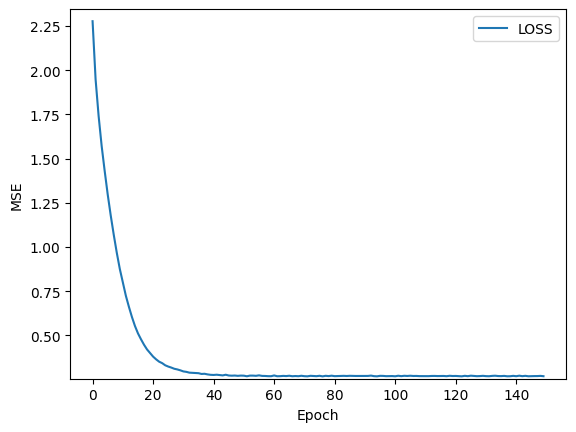


 Evaluate the linear regression model against the test set:
3/3 [==============================] - 0s 2ms/step - loss: 0.2574 - mean_squared_error: 0.2574


[0.25743937492370605, 0.25743937492370605]

In [62]:
# The following variables are the hyperparameters.
learning_rate = 0.005
epochs = 150
batch_size = 60
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_data, train_label, epochs, batch_size)
plot_the_loss_curve(epochs, mse)

print("\n Evaluate the linear regression model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

In [81]:
def create_model_deep(my_learning_rate, my_feature_layer):

    #modelo sequencial simples
    model = tf.keras.models.Sequential()

    #adicionar a  camada de feature columns
    model.add(my_feature_layer)
    
    '''
    model.add(tf.keras.layers.Dense(units=20, 
                                activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(l=0.01),
                                name='Hidden1'))'''

    # Define the first hidden layer with 20 nodes.   
    model.add(tf.keras.layers.Dense(units=20, 
                                    activation='relu', 
                                    name='Hidden1'))
    
    # Define the second hidden layer with 12 nodes. 
    model.add(tf.keras.layers.Dense(units=12, 
                                    activation='relu', 
                                    name='Hidden2'))
    
    # Define the output layer.
    model.add(tf.keras.layers.Dense(units=1,  
                                    name='Output'))                              
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.MeanSquaredError()])
    
    return model


Train_model é a mesma função de antes

Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 0.8927 - mean_squared_error: 0.8927
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7858 - mean_squared_error: 0.7858
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 0.7191 - mean_squared_error: 0.7191
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6576 - mean_squared_error: 0.6576
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6132 - mean_squared_error: 0.6132
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5712 - mean_squared_error: 0.5712
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5353 - mean_squared_error: 0.5353
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5000 - mean_squared_error: 0.5000
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4677 - mean_squared_error: 0.4677
Epoch 10/200
6/6 [===================

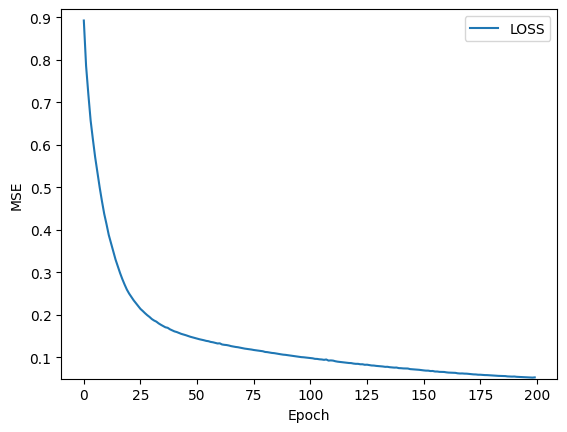


 Evaluate the linear regression model against the test set:
3/3 [==============================] - 0s 3ms/step - loss: 0.1369 - mean_squared_error: 0.1369


[0.13691923022270203, 0.13691923022270203]

In [82]:
# The following variables are the hyperparameters.
learning_rate = 0.005
epochs = 200
batch_size = 60
label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model_deep(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_data, train_label, epochs, batch_size)
plot_the_loss_curve(epochs, mse)

print("\n Evaluate the linear regression model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)